# What this file does

I compare data by race from the RI Dept of Health and census data on the demographics of Rhode Island.

Data sources:

RI DoH Data
https://ri-department-of-health-covid-19-data-rihealth.hub.arcgis.com/

American Community Survey 2018 year estimate
https://data.census.gov/cedsci/table?q=Rhode%20Island%20population&g=0400000US44&hidePreview=true&tid=ACSDP5Y2018.DP05&vintage=2018&layer=VT_2018_040_00_PY_D1&cid=DP05_0001E

Note: You'll need to clarify what Non-Hispanic Other means and how many cases they've been able to identify the race for from the DoH.

# Wrangling DoH data

Major caveat with these percentages is on the RI DoH website: "Percentages do not include cases with unknown or declined demographics or those that are pending further information." You basically can't convert these two raw numbers by multiplying into the total no of cases, hospitalities and fatalities. You also can't really write about this until you know just how many people they collected data from — you need to give readers an accurate idea of what the sample space is. Do they know the race of most of the people they're seeing? Half of them? It is important context for any analysis you do.

If you want to automate pulling in this data, ask the graphics and interactives team to set up the Selenium scraping script  we discussed for you.

In [136]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt

In [ ]:
#read file in 

In [38]:
df_covid = pd.read_csv('DoH_by_race.csv')

In [92]:
#these percentages seem to add up to 100 or near it — I would confirm that this is because of a rounding error, and that these four racial categories are disjoint and should add up to 100. 

In [39]:
df_covid

,Race,metric,percent,date
0,Hispanic/Latinx (any race),cases,43,04-28
1,Non-Hispanic black/African American,cases,13,04-28
2,Non-Hispanic white,cases,39,04-28
3,Non-Hispanic other,cases,4,04-28
4,Hispanic/Latinx (any race),hospitalizations,33,04-28
5,Non-Hispanic black/African American,hospitalizations,13,04-28
6,Non-Hispanic white,hospitalizations,50,04-28
7,Non-Hispanic other,hospitalizations,4,04-28
8,Hispanic/Latinx (any race),fatalities,12,04-28
9,Non-Hispanic black/African American,fatalities,7,04-28


In [93]:
#a pie chart might work better here, except I'd like confirmation that 1) these are disjoint categories and should add up to 100 and 2) I'm worried that Non-Hispanic other will disappear bc it's so small

Text(0, 1, '04-28')

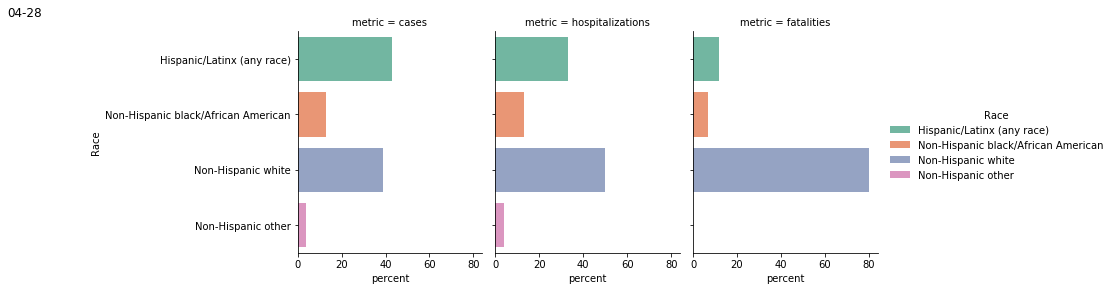

In [142]:
g = sns.catplot(y="Race", x="percent",
                hue="Race", col="metric",orient="h",
                data=df_covid, kind="bar",
                height=4, dodge = False, palette=sns.color_palette("Set2", n_colors=4))
g.fig.suptitle(df_covid['date'].any(), x=0, y=1)

# Wrangling population

The American Community Survey is conducted every year. Unlike the census, it doesn't try to count everyone, but uses sampling. That's why you never look at the ACS in just one year; the error margins are too large. Instead, you use estimates over a three or five year period. Here, I used 2014-2018. 

In [ ]:
#file with fields

In [70]:
df_population_metadata = pd.read_csv('ACSDP5Y2018.DP05_metadata_2020-04-27T161549.csv')

In [ ]:
#fields that mention Hispanic

In [94]:
df_population_metadata[df_population_metadata['id'].str.contains('Hispanic')==True]

,GEO_ID,id,Unnamed: 2
281,DP05_0071E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
282,DP05_0071M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN
283,DP05_0071PE,Percent Estimate!!HISPANIC OR LATINO AND RACE!...,NaN
284,DP05_0071PM,Percent Margin of Error!!HISPANIC OR LATINO AN...,NaN
285,DP05_0072E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
286,DP05_0072M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN
287,DP05_0072PE,Percent Estimate!!HISPANIC OR LATINO AND RACE!...,NaN
288,DP05_0072PM,Percent Margin of Error!!HISPANIC OR LATINO AN...,NaN
289,DP05_0073E,Estimate!!HISPANIC OR LATINO AND RACE!!Total p...,NaN
290,DP05_0073M,Margin of Error!!HISPANIC OR LATINO AND RACE!!...,NaN


In [ ]:
#read in ACS 2018 5 year estimate

In [74]:
df_population = pd.read_csv('ACSDP5Y2018.DP05_data_with_overlays_2020-04-27T161549.csv')

# Understanding Census categories


You don't want to look for "RACE"'; you want to look for "HISPANIC OR LATINO AND RACE". This is broken down into 

- Hispanic or Latino (of any race)
- Not Hispanic or Latino 

The sum of the percentages in each case add up to 100. In this case, its 15 percent and 85 percent respectively.


In [81]:
#"DP05_0071PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Hispanic or Latino (of any race)",
df_population['DP05_0071PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 15.0
Name: DP05_0071PE, dtype: object

In [103]:
percent_hispanic = float(df_population['DP05_0071PE'][1])

In [100]:
#"DP05_0076PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino",

df_population['DP05_0076PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 85.0
Name: DP05_0076PE, dtype: object

In [105]:
percent_non_hispanic = float(df_population['DP05_0076PE'][1])

Hispanic or Latino is further subdivided, as is Not Hispanic or Latino. We care about the second here when we're trying to match up categories to the RI DoH data; they report the data the way they do based on census categories. 

Not Hispanic or Latino:
- White alone
- Black or African American alone
- American Indian or Alaska Native alone 
- Asian alone
- Native Hawaiian and Other Pacific Islander alone
- Some other race alone 
- Two or more races
    
These categories are disjoint sets, so there's no overlap between them. If you add up all the people in each category, you'll get the total number of Non-Hispanic or Latino people in the state. 

Percent in this column is always these values as a percent of the total population; therefore, if you sum up the percentages in these subcategories, they should add up to 85 percent, the percentage of Non-Hispanic or Latino people we found above.



In [88]:
#Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!White alone
df_population['DP05_0077PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                 72.7
Name: DP05_0077PE, dtype: object

In [107]:
percent_non_hispanic_white = float(df_population['DP05_0077PE'][1])

In [89]:
#"DP05_0078PE","Percent Estimate!!HISPANIC OR LATINO AND RACE!!Total population!!Not Hispanic or Latino!!Black or African American alone",
df_population['DP05_0078PE']

0    Percent Estimate!!HISPANIC OR LATINO AND RACE!...
1                                                  5.6
Name: DP05_0078PE, dtype: object

In [104]:
percent_non_hispanic_black = float(df_population['DP05_0078PE'][1])

Non-Hispanic other: If you confirm that the four racial categories that the DoH is reporting add up to 100 percent, this is what you'd do. What that basically means is that this category includes Asians, Native Hawaiians, American Indians, Some other rae alone and two or more races — probably because on their own these percentages would be tiny. But the census doesn't report this — so how do you figure it out? 

In [109]:
#percentage of Non-Hispanic Latino folks - sum of percent of Non-Hispanic whites and Non-Hispanic black people
percent_non_hispanic - (percent_non_hispanic_white + percent_non_hispanic_black)

6.700000000000003

In [110]:
percent_non_hispanic_other = percent_non_hispanic - (percent_non_hispanic_white + percent_non_hispanic_black)

# The values we want

In [ ]:
#Add up to 100! 

In [112]:
percent_non_hispanic_other + percent_non_hispanic_white + percent_non_hispanic_black + percent_hispanic

100.0

In [ ]:
#making this machine readable and nice

In [120]:
dict_values = {}
dict_values['ACS_hispanic'] = percent_hispanic
dict_values['ACS_non_hispanic_black'] = percent_non_hispanic_black
dict_values['ACS_non_hispanic_white'] = percent_non_hispanic_white
dict_values['ACS_non_hispanic_other'] = percent_non_hispanic_other
dict_values
with open('ACS_values.csv', 'w') as f:
    for key in dict_values.keys():
        f.write("%s,%s\n"%(key,dict_values[key]))

In [124]:
df_ACS = pd.read_csv('ACS_values.csv')

In [143]:
df_ACS

,race,percentage_total_population
0,ACS_hispanic,15.0
1,ACS_non_hispanic_black,5.6
2,ACS_non_hispanic_white,72.7
3,ACS_non_hispanic_other,6.7


In [ ]:
#population graph

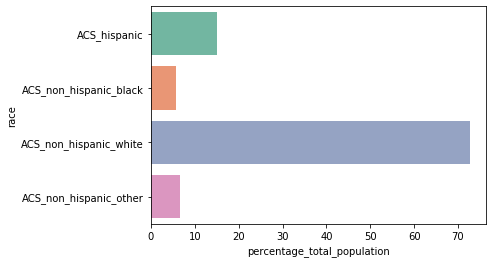

In [138]:
g = sns.barplot(x='percentage_total_population',y='race', orient='h', data=df_ACS, palette=sns.color_palette("Set2", n_colors=4))


# How do you present these findings? 

I wouldn't give people rates — these are estimates and I don't think rates per race are that meaningful. 

I would just state, in Rhode Island, 43 percent of those who tested positive were Hispanic or Latino, whereas just 15 percent of state residents identify as such according to Census Bureau estimates. (https://www.propublica.org/article/early-data-shows-african-americans-have-contracted-and-died-of-coronavirus-at-an-alarming-rate and https://www.nytimes.com/2020/04/07/us/coronavirus-race.html, for reference)
 